## 训练过程（Training Process）
### 训练神经网络涉及以下步骤：

1. 准备数据：通过 DataLoader 加载数据。
2. 定义损失函数和优化器。
3. 前向传播：计算模型的输出。
4. 计算损失：与目标进行比较，得到损失值。
5. 反向传播：通过 loss.backward() 计算梯度。
6. 更新参数：通过 optimizer.step() 更新模型的参数。
7. 重复上述步骤，直到达到预定的训练轮数。


## 神经网络类型
- 前馈神经网络（Feedforward Neural Networks）：数据单向流动，从输入层到输出层，无反馈连接。
- 卷积神经网络（Convolutional Neural Networks, CNNs）：适用于图像处理，使用卷积层提取空间特征。
- 循环神经网络（Recurrent Neural Networks, RNNs）：适用于序列数据，如时间序列分析和自然语言处理，允许信息反馈循环。
- 长短期记忆网络（Long Short-Term Memory, LSTM）：一种特殊的RNN，能够学习长期依赖关系。

In [13]:
import numpy as np
from sklearn.datasets import load_iris
import torch
import torch.nn as nn

# 1. 加载数据
X, y = load_iris(return_X_y=True)

# 转换成Tensor
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()  # 必须是long类型

# 2. 定义模型
model = nn.Sequential(
    nn.Linear(4, 10),
    nn.ReLU(),
    nn.Linear(10, 3)  # 不加Softmax
)

# 3. 定义损失和优化器
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 4. 训练
for epoch in range(100):
    y_pred = model(X)  # [150, 3]
    loss = criterion(y_pred, y)

    # ========== 梯度下降 ==========
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # ========== 计算准确率 ==========
    with torch.no_grad():  # 不需要计算梯度
        predicted_classes = torch.argmax(y_pred, dim=1)  # 取每行最大值的索引
        accuracy = (predicted_classes == y).float().mean().item()

    if epoch % 10 == 0:
        print(f"Epoch [{epoch:03d}/100]  Loss: {loss.item():.4f}  Accuracy: {accuracy*100:.2f}%")


Epoch [000/100]  Loss: 1.2238  Accuracy: 33.33%
Epoch [010/100]  Loss: 1.0510  Accuracy: 33.33%
Epoch [020/100]  Loss: 0.9229  Accuracy: 66.67%
Epoch [030/100]  Loss: 0.7423  Accuracy: 70.67%
Epoch [040/100]  Loss: 0.5777  Accuracy: 68.67%
Epoch [050/100]  Loss: 0.4790  Accuracy: 70.67%
Epoch [060/100]  Loss: 0.4177  Accuracy: 92.00%
Epoch [070/100]  Loss: 0.3636  Accuracy: 95.33%
Epoch [080/100]  Loss: 0.3117  Accuracy: 96.67%
Epoch [090/100]  Loss: 0.2634  Accuracy: 96.67%


Epoch [000/100]  Loss: 0.2428
Epoch [010/100]  Loss: 0.1946
Epoch [020/100]  Loss: 0.1567
Epoch [030/100]  Loss: 0.1155
Epoch [040/100]  Loss: 0.0830
Epoch [050/100]  Loss: 0.0600
Epoch [060/100]  Loss: 0.0398
Epoch [070/100]  Loss: 0.0253
Epoch [080/100]  Loss: 0.0179
Epoch [090/100]  Loss: 0.0141


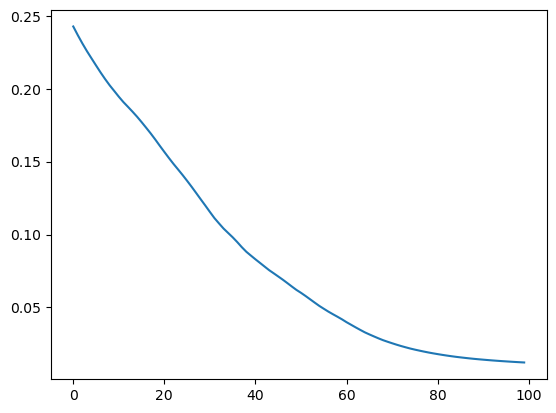

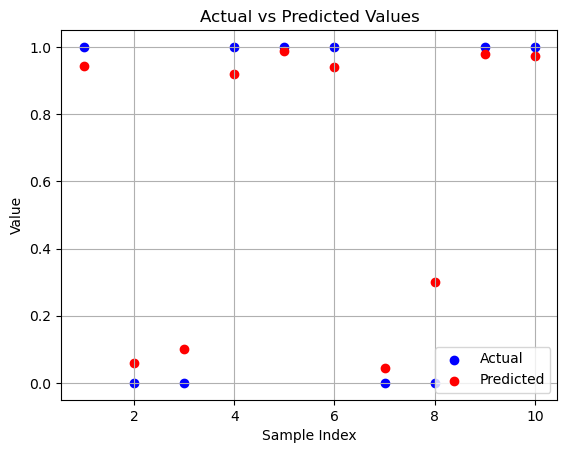

In [32]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

n_in, n_h, n_out, batch_size = 10, 5, 1, 10
x = torch.randn(batch_size, n_in).float()
y = torch.tensor([[1.0],[0.0],[0.0],[1.0],[1.0],[1.0],[0.0],[0.0],[1.0],[1.0],])

model = nn.Sequential(
    nn.Linear(n_in, n_h),
    nn.ReLU(),
    nn.Linear(n_h, n_out),
    nn.Sigmoid()
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

losses = []

for epoch in range(100):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch [{epoch:03d}/100]  Loss: {loss.item():.4f}")

plt.figure()
plt.plot(losses)
plt.show()

y_pred_final = model(x).detach().numpy() ## .detach() 的主要目的是防止梯度计算。当你只想查看模型的输出，而不需要用它来更新模型参数时（比如在推断或可视化时），使用 .detach() 可以避免不必要的计算和内存占用。
plt.figure()
plt.scatter(range(1, batch_size + 1), y.flatten(), label='Actual', color='blue')
plt.scatter(range(1, batch_size + 1), y_pred_final.flatten(), label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()


## 二分类神经网络

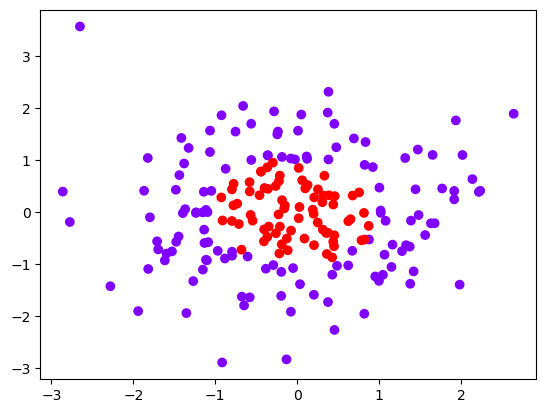

In [83]:
## 造数据
n_samples = 200
data = torch.randn(n_samples, 2).float()
labels = ((data[:, 0]**2 + data[:, 1]**2) < 1).float().unsqueeze(1) ## 增加维度

plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels.numpy(), cmap='rainbow')
plt.show()

In [84]:
print(labels.squeeze()) ##删除维度

tensor([0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
        1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
        0., 0.])


In [85]:
class BinaryClassifierNN(nn.Module):
    def __init__(self):
        super(BinaryClassifierNN, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = BinaryClassifierNN()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
for epoch in range(100):
    y_pred = model(data)
    loss = criterion(y_pred, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch [{epoch:03d}/100]  Loss: {loss.item():.4f}")


Epoch [000/100]  Loss: 0.7272
Epoch [010/100]  Loss: 0.6401
Epoch [020/100]  Loss: 0.5846
Epoch [030/100]  Loss: 0.5451
Epoch [040/100]  Loss: 0.5088
Epoch [050/100]  Loss: 0.4739
Epoch [060/100]  Loss: 0.4339
Epoch [070/100]  Loss: 0.3925
Epoch [080/100]  Loss: 0.3508
Epoch [090/100]  Loss: 0.3106


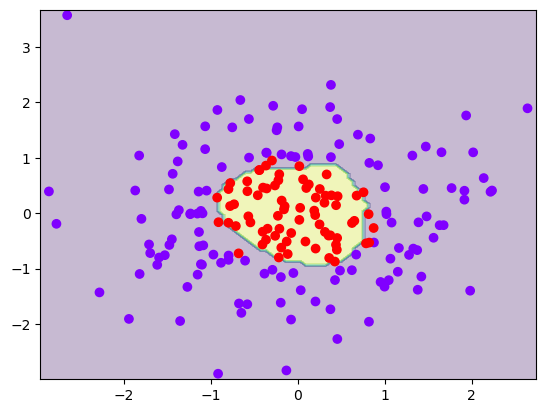

In [86]:
import numpy as np
# 可视化决策边界
def plot_decision_boundary(model, data):
    x_min, x_max = data[:, 0].min() - .1, data[:, 0].max() + .1
    y_min, y_max = data[:, 1].min() - .1, data[:, 1].max() + .1
    x_arr = torch.linspace(x_min, x_max, 100)
    y_arr = torch.linspace(y_min, y_max, 100)

    xx, yy = torch.meshgrid(x_arr, y_arr)
    zz = torch.vstack((xx.ravel(), yy.ravel())).T
    with torch.no_grad():
        y_pred = model(zz)
        y_pred = (torch.sigmoid(y_pred) > 0.5).float()
        plt.contourf(xx, yy, y_pred.reshape(xx.shape), alpha=0.3)
        plt.scatter(data[:, 0], data[:, 1], c=labels.numpy(), cmap='rainbow')
        plt.show()

plot_decision_boundary(model, data)

## 数据处理和加载

In [110]:
import torch
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, X_data, Y_data):
        self.X_data = X_data
        self.Y_data = Y_data

    def __len__(self):
        return self.X_data.shape[0]

    def __getitem__(self, index):
        x = torch.tensor(self.X_data[index]).float()
        y = torch.tensor(self.Y_data[index]).float()
        z = torch.randn(1).float()
        return x, y, z

X_data = np.random.rand(10, 2)
Y_data = np.arange(0, 10)

print(X_data.shape, Y_data.shape)
dataset = MyDataset(X_data, Y_data)
print(dataset)
print(dataset.__len__())
print(dataset.__getitem__(0))
for x, y, z in dataset:
    print(x, y, z)

(10, 2) (10,)
10
(tensor([0.3004, 0.2598]), tensor(0.), tensor([0.4657]))
tensor([0.3004, 0.2598]) tensor(0.) tensor([-0.1541])
tensor([0.3099, 0.1850]) tensor(1.) tensor([-1.0825])
tensor([0.6482, 0.8984]) tensor(2.) tensor([-0.3217])
tensor([0.5121, 0.6614]) tensor(3.) tensor([1.9170])
tensor([0.3820, 0.8838]) tensor(4.) tensor([0.6004])
tensor([0.4256, 0.9435]) tensor(5.) tensor([-0.3987])
tensor([0.8877, 0.6555]) tensor(6.) tensor([-1.2769])
tensor([0.7156, 0.1396]) tensor(7.) tensor([-1.1006])
tensor([0.7229, 0.0756]) tensor(8.) tensor([-0.8365])
tensor([0.2761, 0.8535]) tensor(9.) tensor([1.1151])


In [111]:
from torch.utils.data import DataLoader

dataLoader = DataLoader(dataset, batch_size=10, shuffle=True)

# for batch_idx, (data, labels, z) in enumerate(dataLoader):
#     print(batch_idx, labels)

for a, b, c in dataLoader:
    print(a.shape, b.shape, c.shape)

torch.Size([10, 2]) torch.Size([10]) torch.Size([10, 1])


## 图像数据处理

In [120]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.image as mpimg

img = mpimg.imread("./daffodil.jpg")
img2 = Image.open("./daffodil.jpg")
print(type(img), type(img2))

print(img.shape)
# print(img2.shape) ## error

<class 'numpy.ndarray'> <class 'PIL.JpegImagePlugin.JpegImageFile'>
(480, 480, 3)


In [118]:
transform = transforms.Compose([
    transforms.ToTensor()
])

img3 = transform(img2)
img3.shape

torch.Size([3, 480, 480])

In [122]:
img4 = transforms.ToTensor()(img2) ## 等价img3
img4.shape

torch.Size([3, 480, 480])

<class 'PIL.Image.Image'>


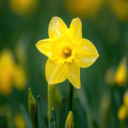

In [141]:
transform = transforms.Compose([
    # transforms.ToTensor(),
    transforms.Resize((128, 128))
])

img5 = transform(img2) ## 转换后还是Image对象, 此时不能传入img对象,因为img是numpy, Resize不支持ndarray, ToTensor支持ndarray,可以在之前先做转换
print(type(img5))
img5

In [144]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128, 128))
])

img6 = transform(img) ## 转换后还是Image对象
print(type(img6), img6.shape)
img7 = transform(img2)
print(type(img7), img7.shape)

<class 'torch.Tensor'> torch.Size([3, 128, 128])
<class 'torch.Tensor'> torch.Size([3, 128, 128])


In [153]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128, 128)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) ## Normalize只能接收Tensor的数据
])

img8 = transform(img2)
# print(type(img8), img8.shape)
type(img8), img8.shape

(torch.Tensor, torch.Size([3, 128, 128]))

### PS: transforms要时刻关注函数可处理的数据类型

In [179]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(45),  # 随机旋转 30 度
    transforms.RandomResizedCrop(128),  # 随机裁剪并调整为 128x128
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

daffodil = Image.open("./daffodil.jpg")
daffodil_tensor = transform(daffodil)
print(type(daffodil_tensor), daffodil_tensor.shape)

# a = daffodil_tensor.numpy()
# b = np.transpose(a, (1, 2, 0))
# import matplotlib.pyplot as plt
# plt.imshow(b)

<class 'torch.Tensor'> torch.Size([3, 128, 128])


In [180]:
def prepare_image_for_display(tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """
    将经过 transforms.Normalize 的张量恢复到 [0,1] 以便显示或保存
    """
    mean = torch.tensor(mean, device=tensor.device).view(-1, 1, 1)
    std = torch.tensor(std, device=tensor.device).view(-1, 1, 1)
    tensor = tensor * std + mean       # 逆归一化
    tensor = torch.clamp(tensor, 0, 1) # 限制范围到 [0,1]
    # (C,H,W) -> (H,W,C)
    return tensor.permute(1, 2, 0)


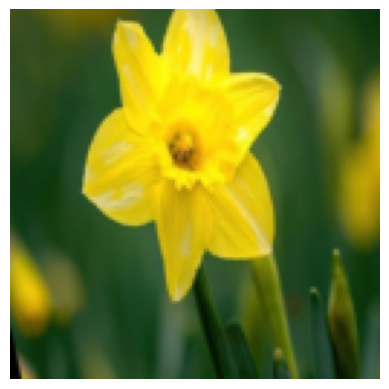

In [181]:
img_tensor = transform(img2)

# 还原为图像
img_np = prepare_image_for_display(img_tensor)

# 显示
plt.imshow(img_np)
plt.axis("off")
plt.show()


In [192]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())


In [184]:
train_dataset ##这是个Dataset对象

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./MNIST
    Split: Train
    StandardTransform
Transform: ToTensor()

In [185]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./MNIST
    Split: Test
    StandardTransform
Transform: ToTensor()

In [186]:
type(train_dataset), type(test_dataset)

(torchvision.datasets.mnist.MNIST, torchvision.datasets.mnist.MNIST)

In [190]:
train_dataset.data.shape, test_dataset.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [191]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# ===================== 数据预处理 =====================
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST 均值和标准差
])

# ===================== 下载数据集 =====================
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# ===================== 拆分训练集为训练集 + 验证集 =====================
train_size = int(0.8 * len(train_dataset))  # 80% 训练
val_size = len(train_dataset) - train_size  # 20% 验证
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# ===================== 创建 DataLoader =====================
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"训练集样本数: {len(train_dataset)}")
print(f"验证集样本数: {len(val_dataset)}")
print(f"测试集样本数: {len(test_dataset)}")


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:07<00:00, 1356057.81it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 455421.31it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:01<00:00, 948584.49it/s] 


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 1150463.72it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

训练集样本数: 48000
验证集样本数: 12000
测试集样本数: 10000


In [200]:
from torch.utils.data import ConcatDataset
combined_dataset = ConcatDataset([train_dataset, val_dataset])
combined_loader = DataLoader(combined_dataset, batch_size=batch_size, shuffle=True)

val_dataset.__len__(), train_dataset.__len__(), combined_dataset.__len__()

(12000, 60000, 72000)